# Deskripsi Tugas

### Tugas Mandiri 

Diberikan beberapa dataset yang merepresentasikan permasalahan pada kasus _supervised learning_. Bandingkanlah beberapa metode klasifikasi pada machine learning (minimal 3 metode) dan jelaskan proses klasifikasi serta analisisnya.

# Menyiapkan _Library_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Menyiapkan Data

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


> Terdapat 14 atribut dari dataset yang semuanya dalam bentuk numerik

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> Tidak terdapat _missing value_ dalam dataset

# EDA

In [7]:
for col in data.columns:
    print('{}: {} data unik'.format(col, len(data[col].value_counts())))

age: 41 data unik
sex: 2 data unik
cp: 4 data unik
trestbps: 49 data unik
chol: 152 data unik
fbs: 2 data unik
restecg: 3 data unik
thalach: 91 data unik
exang: 2 data unik
oldpeak: 40 data unik
slope: 3 data unik
ca: 5 data unik
thal: 4 data unik
target: 2 data unik


Terlihat ada beberapa atribut yang memiliki data unik sedikit (kurang dari 5), yang setelah dilakukan pengecekan terlihat bahwa atribut tersebut dapat dikategorikan sebagai atribut kategorikal

In [8]:
col_cat = []
col_num = []
for col in data.columns:
    if len(data[col].value_counts()) <= 5:
        print('{}:\n{}\n'.format(col, data[col].value_counts()))
        col_cat.append(col)
    else:
        col_num.append(col)

sex:
1    207
0     96
Name: sex, dtype: int64

cp:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

fbs:
0    258
1     45
Name: fbs, dtype: int64

restecg:
1    152
0    147
2      4
Name: restecg, dtype: int64

exang:
0    204
1     99
Name: exang, dtype: int64

slope:
2    142
1    140
0     21
Name: slope, dtype: int64

ca:
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

thal:
2    166
3    117
1     18
0      2
Name: thal, dtype: int64

target:
1    165
0    138
Name: target, dtype: int64



In [9]:
len(col_cat), len(col_num)

(9, 5)

## Atribut Kategorikal

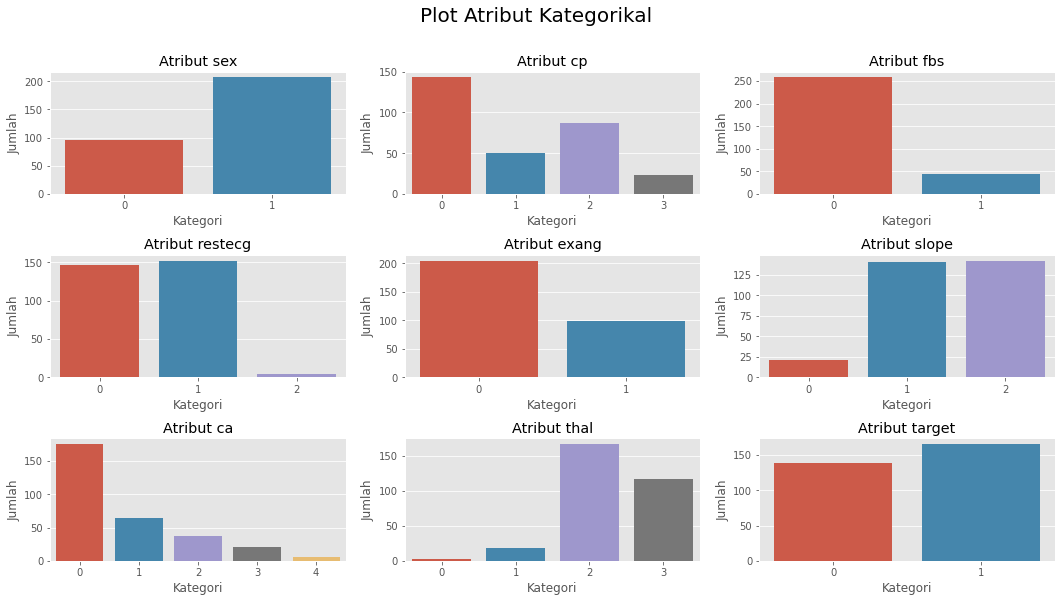

In [10]:
plt.style.use('ggplot')
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18,9))
fig.subplots_adjust(hspace=0.5)
plt.suptitle('Plot Atribut Kategorikal', fontsize=20)

for col, axes in zip(col_cat, ax.flat):    
    g = sns.countplot(x=data[col], data=data, ax=axes)
    g.set_title('Atribut {}'.format(col))
    g.set_xlabel('Kategori')
    g.set_ylabel('Jumlah')

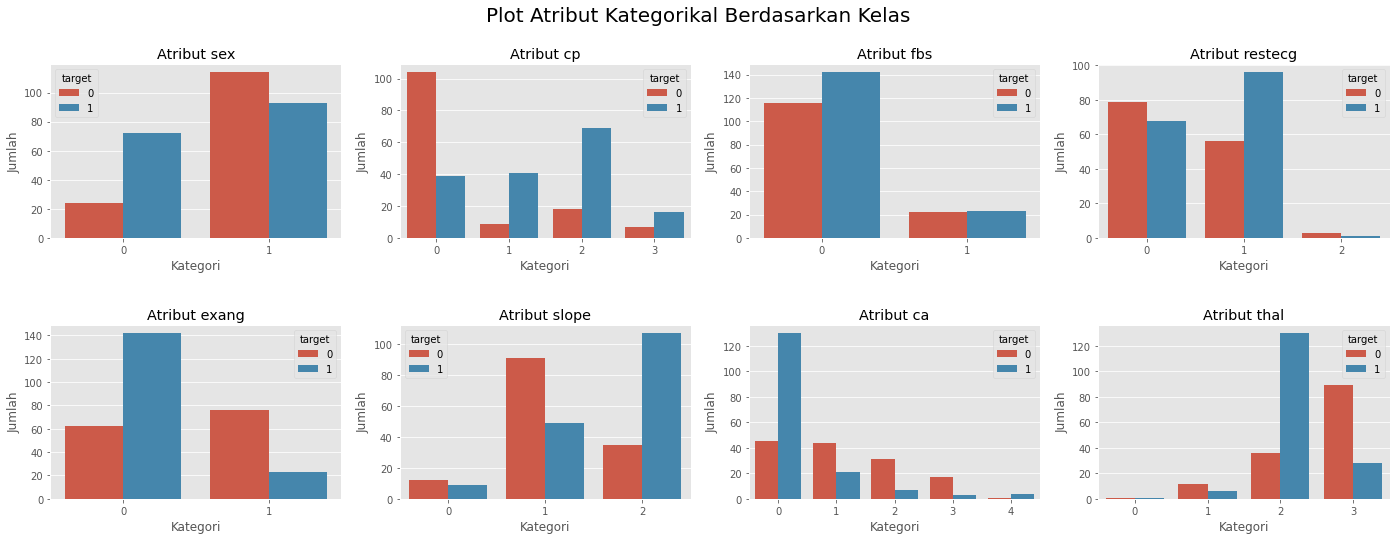

In [11]:
plt.style.use('ggplot')
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(24,8))
fig.subplots_adjust(hspace=0.5)
plt.suptitle('Plot Atribut Kategorikal Berdasarkan Kelas', fontsize=20)

for col, axes in zip(col_cat, ax.flat):
    if col != 'target':
        g = sns.countplot(x=data[col], data=data, ax=axes, hue='target')
        g.set_title('Atribut {}'.format(col))
        g.set_xlabel('Kategori')
        g.set_ylabel('Jumlah')

Terlihat dari visualisasi atribut kategorikal, untuk kelas '1' memiliki beberapa ciri seperti atribut sex '0', cp '1' atau '2', exang '0', slope '2', ca '0', dan thal '2'. Untuk kelas '0' memiliki ciri cp '0', slope '1', dan thal '0'


## Atribut Numerik

### _Outlier Handling_

Text(0.5, 1.0, 'Plot Boxplot Atribut Numerik')

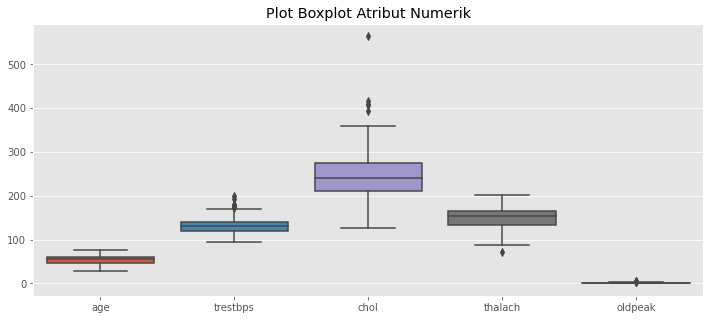

In [12]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
g_bp = sns.boxplot(data=data[col_num])
g_bp.set_title('Plot Boxplot Atribut Numerik')

> Terlihat terdapat _outlier_ pada atribut numerik, yang akan dicek lebih lanjut

In [13]:
Q1 = data[col_num].quantile(0.25)
Q3 = data[col_num].quantile(0.75)
IQR = Q3 - Q1
((data[col_num] < (Q1 - 1.5 * IQR)) | (data[col_num] > (Q3 + 1.5 * IQR))).sum().apply(lambda x: '{:.2f} %'.format(x/data.shape[0]*100)) #round(),2))

age         0.00 %
trestbps    2.97 %
chol        1.65 %
thalach     0.33 %
oldpeak     1.65 %
dtype: object

> _Outlier_ berjumlah sedikit, sehingga akan dihapus

In [14]:
data_clean = data.copy()

for col in col_num:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    data_clean = data_clean[((data_clean[col] >= (Q1 - 1.5 * IQR)) & (data_clean[col] <= (Q3 + 1.5 * IQR)))]
data_clean.shape, data.shape, 'Persentase data tanpa outlier: {:.2f}% dari data awal'.format(data_clean.shape[0]/data.shape[0]*100)

((284, 14), (303, 14), 'Persentase data tanpa outlier: 93.73% dari data awal')

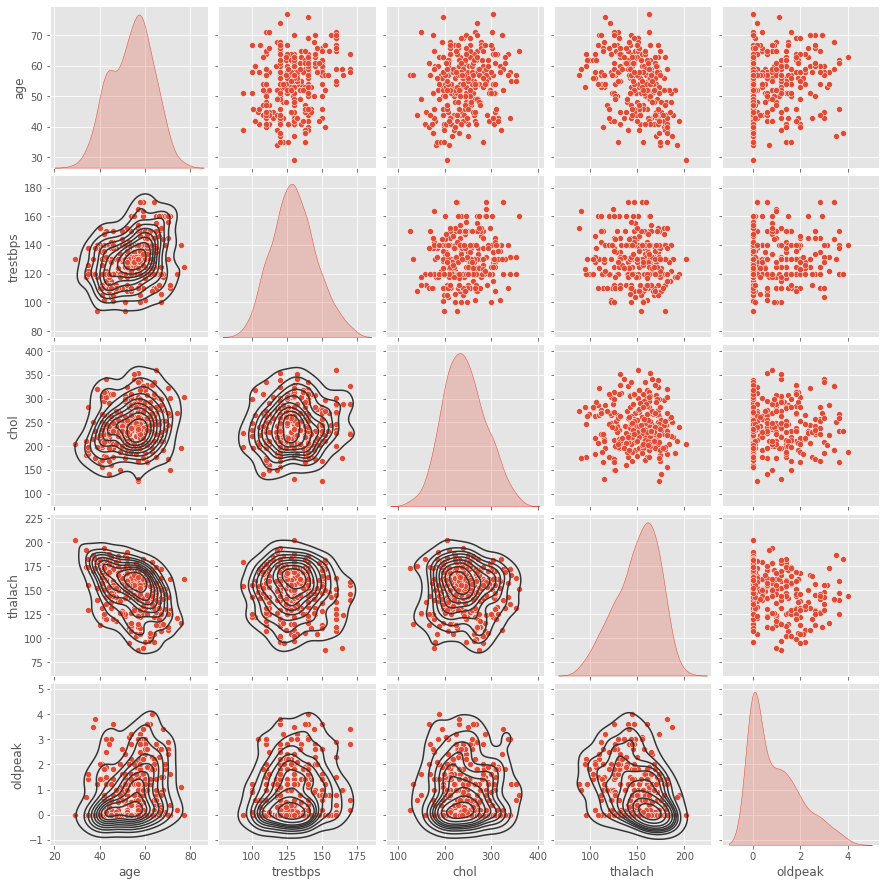

In [15]:
g1 = sns.pairplot(data=data_clean[col_num], diag_kind='kde')
g1.map_lower(sns.kdeplot, color='.2') #levels=4,

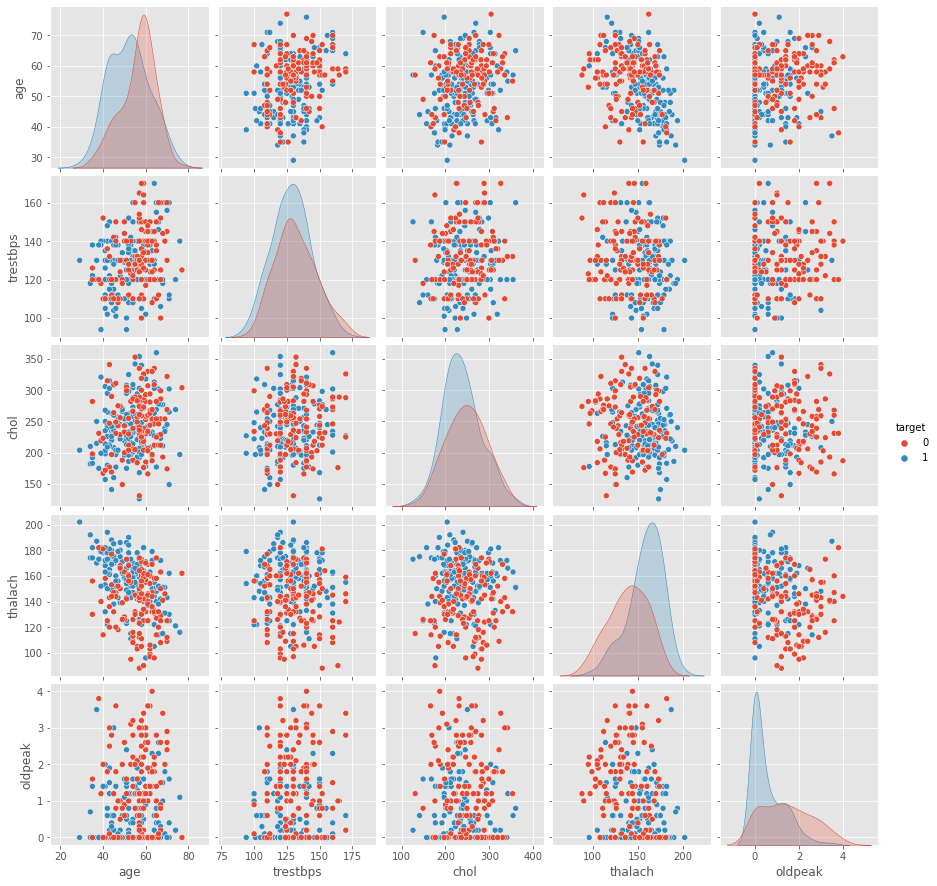

In [16]:
col_numm = col_num.copy()
col_numm.append('target')
sns.pairplot(data=data_clean[col_numm], hue='target')

Text(0.5, 1.0, 'Korelasi Diantara Variabel Numerik')

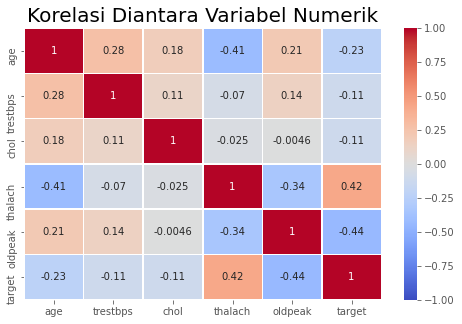

In [17]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,5)
sns.heatmap(data_clean[col_numm].corr(), annot=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi Diantara Variabel Numerik', fontsize = 20)

> Terlihat hanya atribut _thalach_ yang memiliki korelasi positif terhadap atribut kelas.

# Pembuatan Model

## _Preprocessing: Data Transformation_

In [18]:
# normalisasi atribut numerik
data_clean[col_num] = (data_clean[col_num]-data_clean[col_num].min())/(data_clean[col_num].max()-data_clean[col_num].min())

In [19]:
data_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.605263,0.491453,0,1,0.307018,1,0.050,1,0,3,0
299,0.333333,1,3,0.210526,0.589744,0,1,0.385965,0,0.300,1,0,3,0
300,0.812500,1,0,0.657895,0.286325,1,1,0.464912,0,0.850,1,2,3,0
301,0.583333,1,0,0.473684,0.021368,0,1,0.236842,1,0.300,1,1,3,0


Text(0.5, 1.0, 'Boxplot Atribut Numerik yang Siap Digunakan')

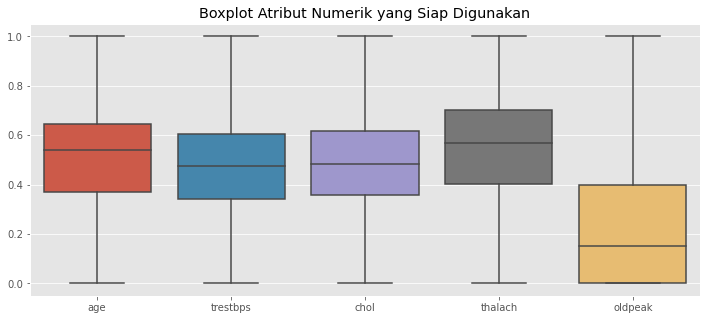

In [20]:
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
g_bp_clean = sns.boxplot(data=data_clean[col_num])
g_bp_clean.set_title('Boxplot Atribut Numerik yang Siap Digunakan')

> Atribut numerik yang akan digunakan pada tahap selanjutnya sudah berada pada interval [0, 1], tidak ada _outlier_ dan hampir semua memiliki distribusi normal. Hanya atribut _oldpeak_ yang distribusinya miring kanan.

## _Splitting Data_

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_tes, y_train, y_tes = train_test_split(data_clean[data_clean.columns[:-1]], data_clean['target'], test_size=0.2, random_state=42)
x_train.shape, x_tes.shape, y_train.shape, y_tes.shape

((227, 13), (57, 13), (227,), (57,))

## _Modelling_

In [22]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

In [23]:
def build_model(list_model, x_train, y_train, x_tes, y_tes):
    mod = []
    acc = []
    prec = []
    rec = []
    f1 = []
    cm = []
    
    for i, model in enumerate(list_model):
        if i<len(list_model)-1:            
            model_ = model(random_state=42).fit(x_train, y_train)
            mod.append(model_)
            y_pred = model_.predict(x_tes)
            acc.append(metrics.accuracy_score(y_tes, y_pred))
            prec.append(metrics.precision_score(y_tes, y_pred))
            rec.append(metrics.recall_score(y_tes, y_pred))
            f1.append(metrics.f1_score(y_tes, y_pred))
            cm.append(metrics.confusion_matrix(y_tes, y_pred))

        else:            
            est = []
            for j in range(i):
                est.append(('model_'+str(j), mod[j]))            
            model_ = model(estimators=est, voting='hard').fit(x_train, y_train)
            y_pred = model_.predict(x_tes)
            acc.append(metrics.accuracy_score(y_tes, y_pred))
            prec.append(metrics.precision_score(y_tes, y_pred))
            rec.append(metrics.recall_score(y_tes, y_pred))
            f1.append(metrics.f1_score(y_tes, y_pred))
            cm.append(metrics.confusion_matrix(y_tes, y_pred))

    return acc, prec, rec, f1, cm

In [24]:
list_model = [DecisionTreeClassifier, LogisticRegression, SGDClassifier, Perceptron, SVC, 
              GaussianProcessClassifier, RandomForestClassifier, AdaBoostClassifier, 
              GradientBoostingClassifier, VotingClassifier]
list_nama_model = ['Decision\nTree', 'Logistic\nRegression', 'Stocasthic\nGradient\nDescent', 'Perceptron', 'Support\nVektor\nMachine',
                   'Gaussian\nProcess', 'Random\nForest', 'Ada Boost', 'Gradient\nBoosting', 'Voting']
acc, prec, rec, f1, cm = build_model(list_model, x_train, y_train, x_tes, y_tes)

## Evaluasi dan Analisis

In [25]:
hasil_metric = pd.DataFrame({'Model': list_nama_model,
                             'Akurasi': [x*100 for x in acc], #acc*100,
                             'Presisi': [x*100 for x in prec],
                             'Recall': [x*100 for x in rec],
                             'F1-Score': [x*100 for x in f1]})
hasil_metric

,Model,Akurasi,Presisi,Recall,F1-Score
0,Decision\nTree,85.964912,87.096774,87.096774,87.096774
1,Logistic\nRegression,84.210526,82.352941,90.322581,86.153846
2,Stocasthic\nGradient\nDescent,80.701754,91.666667,70.967742,80.000000
3,Perceptron,77.192982,73.684211,90.322581,81.159420
4,Support\nVektor\nMachine,82.456140,78.378378,93.548387,85.294118
5,Gaussian\nProcess,91.228070,90.625000,93.548387,92.063492
6,Random\nForest,84.210526,84.375000,87.096774,85.714286
7,Ada Boost,85.964912,92.592593,80.645161,86.206897
8,Gradient\nBoosting,85.964912,89.655172,83.870968,86.666667
9,Voting,87.719298,87.500000,90.322581,88.888889


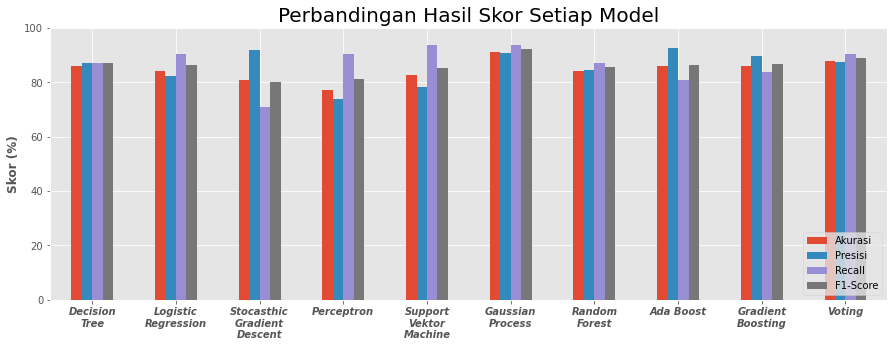

In [26]:
ax = hasil_metric.plot(kind='bar', ylim=(0,100), figsize=(15,5)) #, xticks=hasil_metric.Model)
ax.set_xticks(hasil_metric.index)
ax.set_xticklabels(hasil_metric.Model, rotation=0, fontstyle='italic', fontweight='bold')
ax.set_title('Perbandingan Hasil Skor Setiap Model', size=20)
ax.set_ylabel('Skor (%)', fontweight='bold')
ax.legend(loc=4)

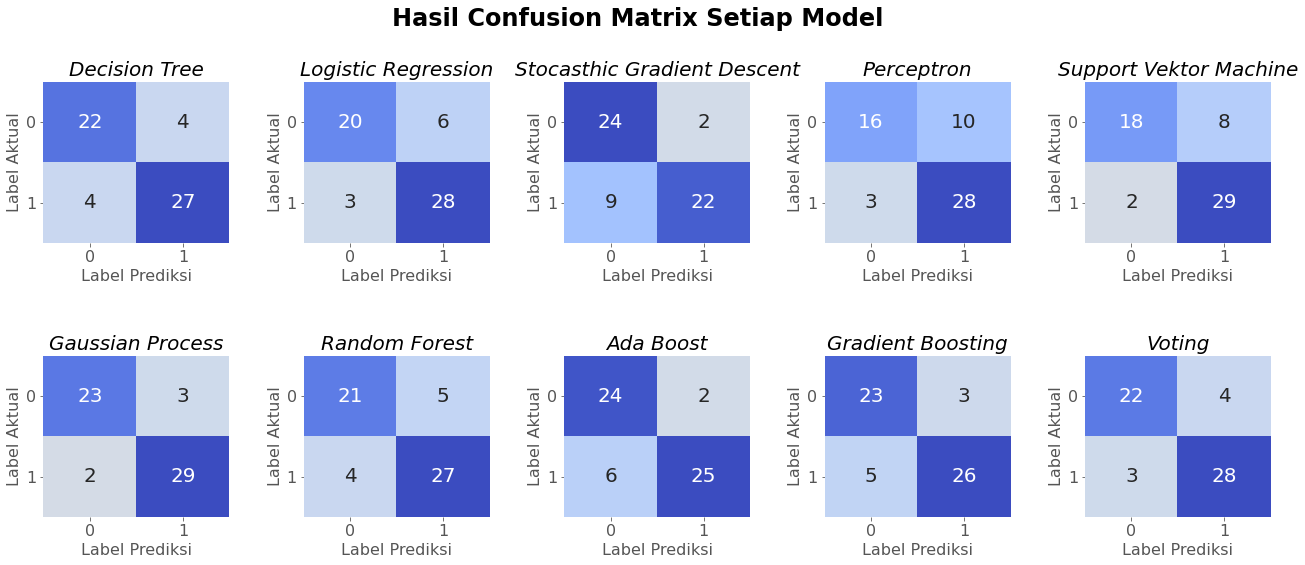

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(22,8))
plt.suptitle('Hasil Confusion Matrix Setiap Model', fontsize=24, y=1.01, fontweight='bold')
plt.subplots_adjust(wspace = 0.4, hspace=0.7)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(list_nama_model[i].replace('\n',' '), size=20, fontstyle='italic')
    g_cm = sns.heatmap(cm[i], annot=True ,fmt='d',cbar=False, cmap='coolwarm_r',
                       center=0, annot_kws={'size': 20}, xticklabels=True, 
                       yticklabels=True)
    g_cm.set_xticklabels(g_cm.get_xticklabels(), fontsize=16) 
    g_cm.set_yticklabels(g_cm.get_yticklabels(), fontsize=16, rotation=0) 
    plt.xlabel('Label Prediksi', fontsize=16)
    plt.ylabel('Label Aktual', fontsize=16) 

> Hasil evaluasi dengan metrik akurasi, _recall_, dan _f1-score_ menunjukkan model _Gaussian Process_ memiliki skor tertinggi. Secara umum, model tersebut menghasilkan skor lebih dari 90% untuk setiap metrik evaluasi yang digunakan. Dari Hasil _Confusion Matrix_ juga menunjukkan model _Gaussian Process_ menghasilkan kesalahan klasifikasi paling sedikit diantara model lainnya.
> Dapat disimpulkan bahwa untuk _case_ dari data yang diberikan, model _Gaussian Process_ adalah model yang terbaik.